[Indice](index.ipynb) | Previo: [Problema3Cuerpos.PuntosEquilibrioLagrange](08.05.00.00.Problema3Cuerpos.PuntosEquilibrioLagrange.ipynb) | Siguiente: [Problema3Cuerpos.Aplicaciones.OrbitasCRTBP](08.06.02.00.Problema3Cuerpos.Aplicaciones.OrbitasCRTBP.ipynb)

## Aplicaciones del CRTBP

Aunque los resultados teóricos de las secciones anteriores parecerían no ser más que curiosidades matemáticas con poca o ninguna importancia en la descripción de sistemas físicos reales (¿qué aplicación podría tener por ejemplo los conceptos de puntos de equilibrio de Lagrange si requieren la increíble coincidencia de que una partícula de prueba se ubique en reposo exactemente sobre ellos para permanecer en reposo allí?) la verdad es que tanto astrónomos como ingenieros aeroespaciales han utilizado estos resultados teóricos para entender y describir fenómenos bastante reales, e incluso para aprovechar la compleja gravitación de los cuerpos reales del sistema solar en función de distintos propósitos de exploración.

### 8.13.6. El radio de Hill y el lóbulo de Roche
<a id='crtbp_esfera_influencia'></a>

Dos de esos conceptos útiles en astronomía derivados del estudio teórico del CRTBP son los de **radio de Hill** o **radio de Roche**.  Para introducir estos concepto, volvamos nuevamente a los conceptos de regiones de exclusión, superficies de cero velocidad, constante de Jacobi y potencial modificado $V_\mathrm{mod}$, pero considerándolos ahora a la luz de lo que aprendimos sobre los puntos de equilibrio de Lagrange.

Calculemos, por ejemplo, el valor del potencial modificado (o la constante de Jacobi) para una partícula que se encuentra justamente sobre el punto de Lagrange $L_1$.  Para ello necesitamos primero calcular de forma muy precisa la posición de este punto sobre el eje $x$:

In [5]:
#Parámetro del sistema
alfa=0.05

#Posición del punto L1
from scipy.optimize import bisect
from pymcel.export import funcion_puntos_colineales
xL1=bisect(funcion_puntos_colineales,0,1-2*alfa,args=(alfa,))
xL2=bisect(funcion_puntos_colineales,1-0.5*alfa,2,args=(alfa,))

In [6]:
print(f"Posición de L_1 : {xL1}")
print(f"Posición de L_2 : {xL2}")

Posición de L_1 : 0.7152253503687463
Posición de L_2 : 1.2280936671011202


El valor de la constante de Jacobi y el potencial modificado será entonces:

In [7]:
from numpy import array
from pymcel.export import constante_jacobi
CJ_L1=constante_jacobi(alfa,[[xL1,0,0]],[[0,0,0]])[0]
Vmod_L1=-CJ_L1/2

In [8]:
print(f"Constante de Jacobi = {CJ_L1}")
print(f"Potencial modificado = {Vmod_L1}")

Constante de Jacobi = 3.420416387383213
Potencial modificado = -1.7102081936916065


Hagamos ahora un gráfico del potencial modificado, resaltando, la curva equipotencial correspondiente a al valor específico calculado anteriormente y la posición de los puntos de Lagrange $L_1$ y $L_2$:

In [10]:
%matplotlib nbagg

<a id='code:esfera_hill'></a>

<IPython.core.display.Javascript object>


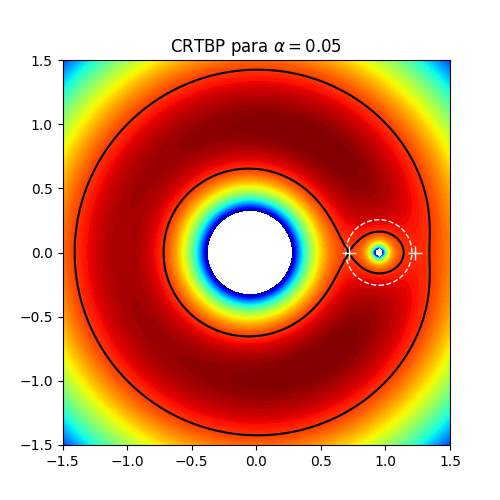

In [11]:
#Malla coordenada
from numpy import meshgrid,zeros_like,linspace
rango=1.5
NG=100
X,Y=meshgrid(linspace(-rango,rango,NG),
             linspace(-rango,rango,NG))
Z=zeros_like(X)

#Distancia relativa
from numpy import sqrt
r1=sqrt((X+alfa)**2+Y**2+Z**2)
r2=sqrt((X-1+alfa)**2+Y**2+Z**2)

#Calcula el potencial
Vmod=-(1-alfa)/r1-alfa/r2-0.5*(X**2+Y**2)

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()

#Contornos
ax.contour(X,Y,Vmod,levels=[Vmod_L1],colors='k',linestyles='solid');
ax.contourf(X,Y,Vmod,levels=linspace(-3,Vmod.max(),100),cmap="jet");

#Posición de los puntos de Lagrange
ax.plot([xL1],[0],'w+',ms=10);
ax.plot([xL2],[0],'w+',ms=10);

#Esfera de Hill
from matplotlib.patches import Circle
ax.add_patch(Circle([1-alfa,0],(alfa/3)**(1./3),
                    color='w',fill=None,linestyle='--'));

#Decoración
ax.set_title(f"CRTBP para $\\alpha={alfa}$");



<a id='fig:08.06.01.00.Problema3Cuerpos.Aplicaciones.RadioHill_125'></a><center><b>Figura 8.125.</b> Gráfico del potencial modificado en el CRTBP (mapa de colores) resaltando las curvas equipotenciales correspondientes al valor del potencial del punto de Lagrange $L_1$ (curva sólida negra), la posición de los puntos de Lagrange $L_1$ y $L_2$ (cruces blancas) y la esfera de Hill (circunferencia rayada). </center>

¿Cómo podemos interpretar el mapa del potencial en la Figura ([code:esfera_hill](#fig:code:esfera_hill))?.  Imaginemos que ponemos una partícula de prueba en reposo sobre el punto de Lagrange $L_1$.  Por tratarse de un punto de equilibrio, la partícula permanecerá allí para siempre. 

Si perturbamos levemente su posición, por ejemplo, empujándola un poco hacia la derecha, el potencial dictará que la partícula de prueba terminará acelerándose hacia la partícula 2.  

Sin modificar mucho las condiciones dinámicas, la curva equipotencial es también, en ese caso, el límite de la región de exclusión correspondiente.  Por lo tanto la trayectoria de la partícula inicialmente perturbada, se mantendrá restringida a los límites impuestos por esa curva equipotencial.  

La misma situación aplica si empujaramos la partícula hacia la izquiera, de modo que su trayectoria quedará atrapada en la región con forma de gota que delimita el equipotencial alrededor de la partícula 1.

Podemos considerar por tanto la curva equipotencial correspondiente a $L_1$ (o lo que es lo mismo, la superficie de cero velocidad que pasa por ese punto) como el límite de las regiones dentro de las cuáles, partículas inicialmente en reposo (en el sistema rotante por supuesto) se mantendrán ligadas a las partículas masivas.  Este equipotencial delimita, por decirlo de otra manera, las regiones del espacio en los que la gravedad de cada cuerpo domina sobre el otro.

Podemos dividir esta región en dos partes:

- Aquella que limita el espacio alrededor de la partícula 1 (la más masiva).  Llamamos a esta región el **lóbulo de Roche** (por su forma particular). La dinámica de las partículas dentro de esta región esta dominada por este cuerpo.  Si una partícula atraviesa ese límite (especialmente si lo hace cerca a $L_1$) terminará siendo *transferida* al cuerpo 2. El volumen del lóbulo de Roche es muy importante en distintas aplicaciones astrofísicas y se cuantifica con el denominado **radio de Roche** (ver el cuadro de Nota *el radio de Roche*).

- Aquella que limita el espacio alrededor de la partícula 2 (la menos masiva).  Esta región, que también tiene una forma no trivial, puede en el caso de $\alpha\ll 1$ aproximarse como una esfera con un radio igual a la distancia relativa del punto $L_1$ a la partícula 2 (que es aproximadamente igual también en este caso a la distancia relativa de $L_2$). Llamamos a esta esfera imaginaria la **esfera de Hill** y su radio, por definición, lo asumiremos igual a la aproximación analítica de $R_{L1}$ de la Ec. ([L1_aprox](#mjx-eqn-eq%3AL1_aprox)):

$$
R_H\equiv\sqrt[3]{\frac{\alpha}{3}}
$$

> **Nota: el radio de Roche**.  En el estudio de estrellas binarias interactuantes se acostumbra, en lugar del radio de Hill, usar el **radio de Roche.**<a id=''></a> definido como el radio de una esfera con el mismo volumen contenido dentro de la equipotencial (bien sea de la partícula 1, el lóbulo de Roche o de la partícula 2, el equivalente a la esfera de Hill).

> Es bien conocida en la literatura especializada la aproximación analítica de Eggleton <cite data-cite="Eggleton1983"><a href="mybook.html#Eggleton1983">Eggleton, 1983</a></cite> para el radio de Roche:

> $$
  R_L=\frac{0.49q^{2/3}}{0.6 q^{2/3}+\log(1+q^{1/3})}
  $$
> donde $q=1/\alpha$ para el caso del lóbulo de Roche la partícula masiva y $q=\alpha$ en el caso de la partícula menos masiva.  Esta fórmula provee el valor del radio de Roche con una precisión inferior a 1\% para cualquier valor en el intervalo $0<q<\infty$.

Una situación astrofísica concreta en la que esta teoría tiene aplicación se produce cuando dos estrellas evolucionan a una distancia muy cercana una de otra.  Llamamos a este tipo de sistemas *binarias de contacto*.  En este tipo de binarias, una o las dos estrellas pueden alcanzar estadíos evolutivos en los que crece hasta ser tan grande como su lóbulo de Roche.  Cuando esta situación se produce, parte de la materia en la envoltura de la estrella que creció es transferida a la otra estrella, proceso en el cuál se pueden dar fenómenos astrofísicos muy interesantes.  

En el caso en que las componentes sean estrellas normales, el fenómeno conduce a la formación de lo que se conoce como una envoltura común, o lo que podríamos describir como una "estrella siamés": dos cuerpos unidos por el cuello de sus lóbulos de Roche.  Las estrellas bajo esta condición evolución de formas diferentes a como lo hacen estrellas individuales o con compañeras situadas a una distancia mucho mayor que su tamaño.

Algunos de los fenómenos más interesantes se producen cuando una de las compañeras es lo que se conoce en astrofísica como un objeto compacto: una enana blanca, una estrella de neutrones o un agujero negro.  El interés en estos casos estriba en que al tratarse estos últimos de objetos con una densidad muy alta y un campo gravitacional superficial muy intenso, la transferencia de materia *fresca* de su estrella compañera puede, primero, crear una nueva entidad astrofísica conocida como un disco de acreción.  Estos discos pueden ser fuentes de radiación de alta energía que permite detectar el sistema.  En la Figura ([xray_binary](#fig:xray_binary)) se muestra una representación artística de un sistema con estas características.

En segundo lugar, si la cantidad de materia transferida es muy grande, el objeto compacto puede volverse inestable.  En algunos casos se pueden producir "pequeños" estallidos (que dan lugar a fenómenos astronómicos conocidos como Novas) o grandes estallidos que destruyen el objeto compacto y posiblemente su compañero. En este caso puede producirse lo que los astrofísicos llaman *Supernovas tipo Ia*. 

<a id='fig:xray_binary'></a>![Representación artística de la transferencia de masa desde una estrella que ha llenado su lóbulo de Roche (a la derecha) tras alcanzar un estadío evolutivo tardío y un objeto compacto (compañera binaria) alrededor del cual se forma un disco de acreción (disco azul a la izquierda).  Este tipo de sistemas puede emitir abundante rayos X lo que permite que la presencia del compañero invisible sea detectadas.++t!++1.0++\label{fig:xray_binary}](./figures/horizontal_xray_binary.png)

<center><b>Figura 8.126</b>. Representación artística de la transferencia de masa desde una estrella que ha llenado su lóbulo de Roche (a la derecha) tras alcanzar un estadío evolutivo tardío y un objeto compacto (compañera binaria) alrededor del cual se forma un disco de acreción (disco azul a la izquierda).  Este tipo de sistemas puede emitir abundante rayos X lo que permite que la presencia del compañero invisible sea detectadas.</center>

En todos esos casos, conocer el radio del lóbulo de Roche, su relación con las propiedades orbitales del sistema y la densidad de la estrella a la que se está arrebatando masa, es fundamental para entender las observaciones que se realizan del sistema desde la Tierra.

En el estudio de la dinámica del Sistema Solar o de cualquier otro sistema planetario, el cálculo del radio de la esfera de Hill es fundamental para la descripción de las órbitas de satélites espaciales o naves espaciales, incluso para entender su destino a largo plazo.  

Consideremos un primer caso simple: el sistema Sol-Tierra.  Sabemos que la Tierra en la actualidad tiene una órbita con una excentricidad muy baja (menos de 2\%).  Por lo tanto podemos aplicar la teoría del CRTBP para describir lo que pasa a cuerpos mucho menos masivos que se mueven en el espacio entre nuestro planeta y el Sol.

En el algoritmo a continuación se calcula primero el parámetro $\alpha$ del sistema Tierra-Sol:

In [17]:
#Lee las masas de los planetas
from spiceypy import furnsh
furnsh("pymcel/data/de430.tpc")

#Constante de gravitación universal 
G=6.67e-20 # km^3 / kg s^2

#Masa de la Tierra y el sol
from spiceypy import bodvrd
mutierra=bodvrd("EARTH","GM",1)[1][0]
musol=bodvrd("SUN","GM",1)[1][0]

#Parámetro alfa
alfa=mutierra/(mutierra+musol)

In [18]:
print(f"Sistema Sol-Tierra, alfa = {alfa}")

Sistema Sol-Tierra, alfa = 3.0404234038181026e-06


Con el valor de alfa podemos calcular el radio de la esfera de Hill de la Tierra:

In [19]:
a=1.496e8 #km
RH_Tierra=a*(alfa/3)**(1./3)

In [21]:
print(f"Radio de Hill de la Tierra, R_H = {RH_Tierra:e}")

Radio de Hill de la Tierra, R_H = 1.502689e+06


Es decir, dentro de una esfera de aproximadamente 1.5 millones de km, podemos considerar que una partícula que se suelta en reposo en el sistema rotante, se mantendrá siempre cerca a la Tierra, como un satélite o Luna.  Naturalmente, esto no significa que su órbita será kepleriana respecto a esta última (el Sol puede producir una significativa perturbación gravitacional sobre su trayectoria), pero a largo plazo su trayectoria no la alejará a una distancia mayor que $R_H$ de la Tierra.

Simulaciones detalladas del movimiento de satélites alrededor de planetas, han mostrado que en realidad estos cuerpos tienden a permanecer tiempos relativamente largos en orbitas estables si su distancia al planeta no es mayor que entre 1/3 y 1/2 del radio de Hill.  Ese es precisamente el caso de la Luna.  Su distancia media a la Tierra, $383.000$ km la ubica a casi 1/4 parte del radio de Hill de nuestro planeta, pero cerca de la mitad de la distancia mínima más conservadora ($\sim 725.000$ km) para que la órbita se haga inestable.

Las lunas de otros planetas, especialmente de planetas gigantes y lejanos, están bien adentro de la esfera de Hill de su respectivo planeta.  En el algoritmo a continuación se calcula el radio de Hill de los planetas del Sistema Solar:

In [43]:
#Cargamos las efemérides de los planetas
furnsh("pymcel/data/de430.bsp")

planetas=["MERCURY_BARYCENTER","VENUS_BARYCENTER",
                "EARTH",
                "MARS_BARYCENTER",
                "JUPITER_BARYCENTER","SATURN_BARYCENTER",
                "URANUS_BARYCENTER","NEPTUNE_BARYCENTER"]

#Masa de la Tierra y el sol
RH=dict()
for planeta in planetas:
    #Parámetro de masa
    muplaneta=bodvrd(planeta,"GM",1)[1][0]

    #Parámetro alfa
    alfa=muplaneta/(muplaneta+musol)

    #Semieje mayor
    from spiceypy import spkezr,oscltx
    xplaneta,tluz=spkezr(planeta,0,"J2000","None","SUN")
    elementos=oscltx(xplaneta,0,musol)
    aplaneta=elementos[9]
    
    #Radio de Hill
    RH[planeta]=aplaneta*(alfa/3)**(1./3)

In [49]:
for planeta in planetas:
    print(f"Radio de Hill de {planeta.split('_')[0]}: {RH[planeta]/1e6} millones de km")

Radio de Hill de MERCURY: 0.22067450795455779 millones de km
Radio de Hill de VENUS: 1.0111476710161926 millones de km
Radio de Hill de EARTH: 1.5033470375472335 millones de km
Radio de Hill de MARS: 1.0840564936087809 millones de km
Radio de Hill de JUPITER: 53.19417610097791 millones de km
Radio de Hill de SATURN: 65.48868970009971 millones de km
Radio de Hill de URANUS: 70.23685638894752 millones de km
Radio de Hill de NEPTUNE: 116.187691712555 millones de km


El planeta con el radio de Hill más grande del sistema solar es con mucho Neptuno.  La razón es una combinación de su masa y su enorme distancia al Sol.  Lo sorprendente es que en el espacio de la esfera de Hill de este planeta cabrían casi todos los planetas interiores (Mercurio, Venus y la Tierra). 

Nótese que los radios de Hill de los planetas Venus, Tierra y Marte, a pesar de sus diferencias de masa y distancia al Sol, son aproximadamente los mismos ($\sim 1$ millón de km).  Este hecho es significativo sobre todo en el caso de Marte, que tiene una masa casi 10 veces menor que la de la Tierra.  La razón por la cuál Marte tiene un radio de Hill similar a nuestro planeta es simplemente su distancia mayor al Sol, que compensa su baja masa.

¿Qué pasa con el radio de Hill de las lunas planetarias?.  Consideremos por ejemplo el caso de la estraña luna Pan del planeta Saturno.  En el algoritmo a continuación se consignan las propiedades de este cuerpo y de su planeta central, Saturno y se calcula el radio de Hill 

<a id='fig:pan'></a>![Fotografía de la luna de Saturno *Pan* tomada por la sonda Cassini.  Pan es una pequeña luna irregular con un *cinturón* de polvo en su ecuador, que reside entre las partículas de los anillos de Saturno. Crédito: NASA.++t!++0.5++\label{fig:pan}](./figures/square_pan.png)

<center><b>Figura 8.127</b>. Fotografía de la luna de Saturno *Pan* tomada por la sonda Cassini.  Pan es una pequeña luna irregular con un *cinturón* de polvo en su ecuador, que reside entre las partículas de los anillos de Saturno. Crédito: NASA.</center>

In [86]:
m1=5.7e26 #Masa del planeta, kg
m2=4.2e15 #Masa del satélite, kg
a=130000 #Distancia media a Saturno, km
Rs=16 #Radio del satélite, km, 

#Parámetro del CRTBP
alfa=m2/(m1+m2)

#Radio de Hill
RH=a*(alfa/3)**(1./3)

In [87]:
print(f"Radio de Hill de Pan = {RH}")

Radio de Hill de Pan = 17.53992555057494


¿Qué nota usted de curioso en estos números?.  Si comparamos el radio de Hill del satélite con su radio físico, descubrimos que la masa de este curioso satélite llena casi completamente su esfera de Hill.  ¿Qué pasaría en el caso de que el satélite fuera en realidad más grande que su esfera de Hill?.  Esta situación especial reviste mucho interés en las ciencias planetarias.  Si el cuerpo es solo un conjunto de rocas apiladas por su autogravedad (como parece ser el caso de muchas lunas planetarias pequeñas y otros cuerpos del sistema solar como asteroides y cometas, es de esperarse que las partículas del cuerpo que están más afuera empezarán a moverse hacia el planeta, desprendiéndose del satélite.  Con suficiente tiempo el cuerpo terminaría sino desintegrándose, al menos perdiendo una buena parte de su masa.  El satélite Pan esta cerca a ese límite.

¿Cuál es la condición que debe cumplir un satélite poco cohesionado para que se produzca esta situación?.  Si asumimos por simplicidad que la materia del satélite se reune formando un cuerpo casi esférico de radio promedio $R_s$ y densidad $\rho_s$, la condición crítica para que el cuerpo empiece a desintegrarse será:

$$
R_s=R_H
$$

Reemplazando $R_H$:

$$
R_S^3 = a_R^3 \frac{M_s}{3M_p}
$$
donde $a_R$ es la distancia crítica en la que empieza a ocurrir la desintegración y $M_p$ es la masa del planeta que asumimos mucho más grande que la masa del satélite.  

Si ahora expresamos la masa del planeta y el satélite en términos de sus densidades medias $M_s=4\pi\rho_s R_S^3/3$ y $M_p=4\pi\rho_p R_S^3/3$ y despejamos $a_c$ obtenemos:

$$
a_R=\left(3\frac{\rho_p}{\rho_s}\right)^{1/3} R_p
$$

Siempre que el satélite se encuentre a distancia menores que esta distancia crítica, el proceso de desintegración hará se desintegre total o parcialmente.  Esta condición la podemos expresar como:

\begin{equation}
\label{eq:radio_Roche}
a\leq a_R\equiv1.44\left(\frac{\rho_p}{\rho_s}\right)^{1/3} R_p
\end{equation}

Llamamos a la distancia crítica $a_R$ el **límite de Roche** para agregados de partículas (cuerpos sin cohesión interna).  Este límite no debe confundirse, aunque naturalmente vienen de principios teóricos relacionados, con el *radio de Roche* definido anteriormente.

Podemos analizar el caso de Pan a la luz del recién definido límite de Roche.  Para calcularlo debemos conocer la densidad del planeta, su radio y la densidad del satélite:

In [88]:
Rp=5.8e4 #Radio de Saturno, km

#Densidad promedio de Saturno
from numpy import pi
rhop=m1/(4*pi*(Rp*1e3)**3/3)
rhos=m2/(4*pi*(Rs*1e3)**3/3)

#Límite de Roche de Saturno para cuerpos con la densidad de Pan
aR=3**(1/3)*(rhop/rhos)**(1/3)*Rp

In [89]:
print(f"Densidad media de Saturno: {rhop} kg/km^3")
print(f"Densidad media de Pan: {rhos} kg/km^3")
print(f"Límite de Roche de Saturno: {aR} km")
print(f"Distancia de Pan a Saturno: {a} km")

Densidad media de Saturno: 697.4326353252005 kg/km^3
Densidad media de Pan: 244.79397985325699 kg/km^3
Límite de Roche de Saturno: 118586.59228611788 km
Distancia de Pan a Saturno: 130000 km


Como vemos Pan esta tan solo un poco más afuera del límite de Roche de Saturno y esta es seguramente la razón por la que todavía podemos verlo de *cuerpo entero*. 

Una de las teorías que explica el origen de los anillos de Saturno (entre los que se mueve Pan) explica que las partículas que forman esta estructura se pudieron desprender de la corteza de lunas antiguas que por las interacciones con el planeta, con otras lunas o con gases alrededor de ellos, pudieron migrar hasta alcanzar distancias menores que sus correspondientes límites de Roche.

[Indice](index.ipynb) | Previo: [Problema3Cuerpos.PuntosEquilibrioLagrange](08.05.00.00.Problema3Cuerpos.PuntosEquilibrioLagrange.ipynb) | Siguiente: [Problema3Cuerpos.Aplicaciones.OrbitasCRTBP](08.06.02.00.Problema3Cuerpos.Aplicaciones.OrbitasCRTBP.ipynb)